In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Data Handling

In [2]:
data = pd.read_csv("CS98XClassificationTrain.csv")

In [3]:
data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


#### Explore Top Genre  Balance

In [3]:
#count genres
data["top genre"].value_counts()

adult standards           68
album rock                66
dance pop                 61
glam rock                 16
brill building pop        16
                          ..
yodeling                   1
uk garage                  1
bow pop                    1
classic danish pop         1
australian talent show     1
Name: top genre, Length: 86, dtype: int64

Text(0.5, 1.0, 'The number of instances per genre')

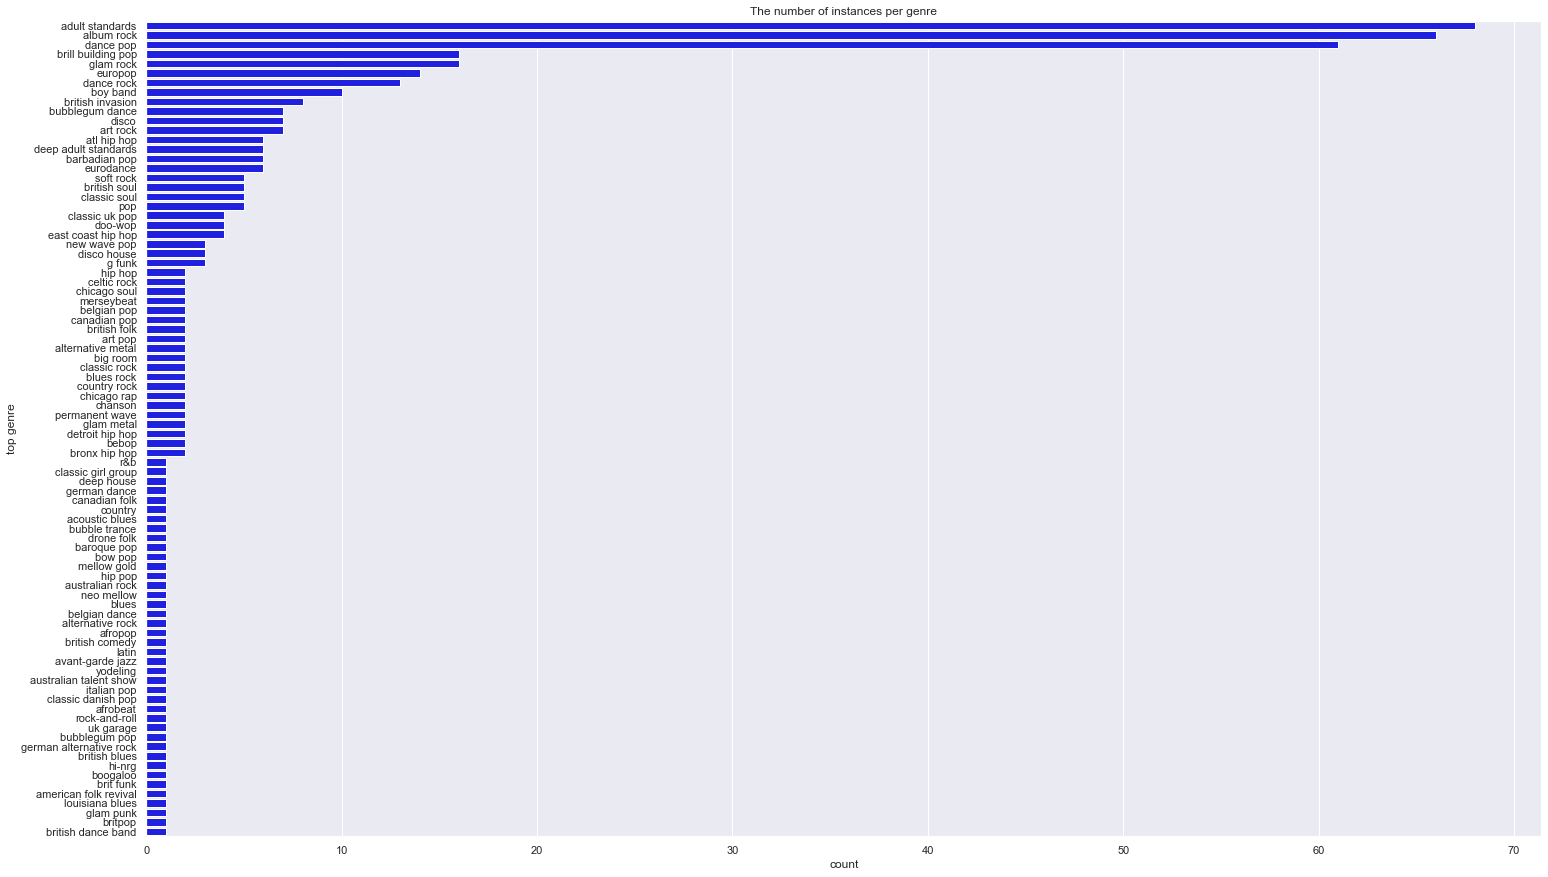

In [7]:
sns.set(rc={'figure.figsize':(25,15)})
sns.countplot(y="top genre", data=data, color='blue',order = data['top genre'].value_counts().index).set_title('The number of instances per genre')

#### Summary of the numeric attributes

In [8]:
data.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


#### Visualisation for the correlations

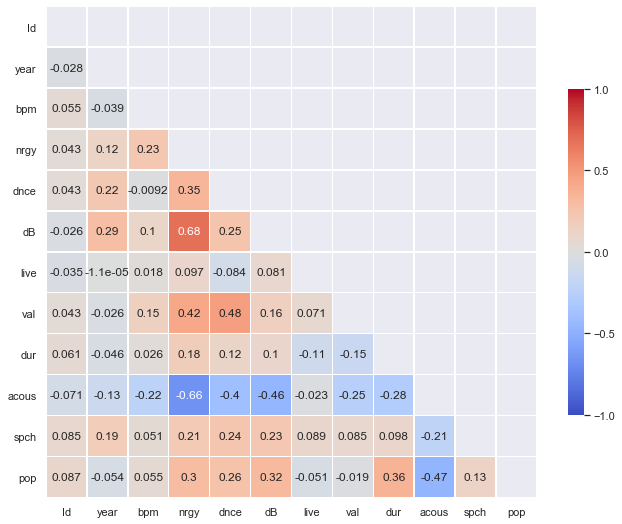

In [10]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
corr_heatmap(data)

### Data Preparation

In [4]:
#null values per column
data.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [12]:
#drop n/a values (deleting 15 rows)
sp_data=data.dropna()
sp_data.shape

(438, 15)

In [13]:
sp_data.values
features = ["pop", "spch", "acous", "dur", "val", "live","dB","dnce","nrgy","bpm"]
X_train = sp_data[features].values
y_train = sp_data['top genre'].values

###  Data Analysis

In [14]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=80, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=80, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [15]:
#accuracy score
ypred2 = rnd_clf.predict(X_train)
print("Accuracy score: " ,accuracy_score(y_train, ypred2))

Accuracy score:  0.9269406392694064


In [16]:
#evaluation report
print(metrics.classification_report(y_train, ypred2))

                         precision    recall  f1-score   support

         acoustic blues       1.00      1.00      1.00         1
        adult standards       0.79      1.00      0.88        68
               afrobeat       1.00      1.00      1.00         1
                afropop       1.00      1.00      1.00         1
             album rock       0.92      0.98      0.95        66
      alternative metal       1.00      1.00      1.00         2
       alternative rock       1.00      1.00      1.00         1
  american folk revival       0.00      0.00      0.00         1
                art pop       1.00      1.00      1.00         2
               art rock       1.00      0.43      0.60         7
            atl hip hop       1.00      1.00      1.00         6
        australian rock       1.00      1.00      1.00         1
 australian talent show       1.00      1.00      1.00         1
       avant-garde jazz       1.00      1.00      1.00         1
          barbadian pop 

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
forest_scores1 = cross_val_score(rnd_clf, X_train, y_train,
                                scoring="accuracy", cv=10)
print(forest_scores1)

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.27272727 0.29545455 0.27272727 0.34090909 0.31818182 0.29545455
 0.29545455 0.27272727 0.3255814  0.27906977]


In [18]:
for name, score in zip(features, 
                       rnd_clf.feature_importances_):
    print(name, score)

pop 0.11152900891077108
spch 0.06363511244527116
acous 0.10862338714991943
dur 0.1372098407208976
val 0.09488631679870928
live 0.08026867632244475
dB 0.07977730026764725
dnce 0.10724496631603518
nrgy 0.11960514612338513
bpm 0.09722024494491906


In [19]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 100, 300], 'max_features': [2, 4, 6,8]},
    # then try 8 (2×4) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [100, 300], 'max_features': [2, 4, 6,8]},
  ]

forest_clf = RandomForestClassifier()
# train across 5 folds, that's a total of (12+8)*5=100 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
#show best hyperparameters
grid_search.best_params_

{'max_features': 2, 'n_estimators': 300}

In [21]:
#show best estimator
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_train)

#accuracy score
print("Accuracy score: " ,accuracy_score(y_train, final_predictions))

Accuracy score:  1.0


In [23]:
forest_scores = cross_val_score(final_model, X_train, y_train, scoring="accuracy", cv=10)
print(forest_scores)

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.34090909 0.29545455 0.27272727 0.31818182 0.31818182 0.27272727
 0.29545455 0.20454545 0.27906977 0.34883721]


In [24]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
ypred = bag_clf.predict(X_train)
print("Accuracy Score: ",accuracy_score(y_train, ypred))

Accuracy Score:  0.7488584474885844


In [25]:
#out-of-bag evaluation
bag_clf.oob_score_

0.2968036529680365

In [26]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(kernel="poly", degree=7, coef0=1, C=5,random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [27]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_train, ypred))

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.3287671232876712
RandomForestClassifier 1.0
SVC 0.9771689497716894


/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.9794520547945206


### Output the results for Kaggle competition

In [29]:
#import Test dataset
data_test = pd.read_csv("CS98XClassificationTest.csv")

In [30]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      113 non-null    int64 
 1   title   113 non-null    object
 2   artist  113 non-null    object
 3   year    113 non-null    int64 
 4   bpm     113 non-null    int64 
 5   nrgy    113 non-null    int64 
 6   dnce    113 non-null    int64 
 7   dB      113 non-null    int64 
 8   live    113 non-null    int64 
 9   val     113 non-null    int64 
 10  dur     113 non-null    int64 
 11  acous   113 non-null    int64 
 12  spch    113 non-null    int64 
 13  pop     113 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


In [31]:
#separate out the predictors and labels
data_test.values
features = ["pop", "spch", "acous", "dur", "val", "live","dB","dnce","nrgy","bpm"]
X_test = data_test[features].values

In [32]:
#predictions from hard voting classifier
test_predictions_final = voting_clf.predict(X_test)

In [33]:
#export the predictions in csv files for kaggle:
pd.DataFrame(test_predictions_final).set_index(data_test['Id']).rename(columns={0:'top genre'}).to_csv('upload_final_voting.csv')